# Análisis de serie de tiempo con ARIMA

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

ARIMA o Modelo autorregresivo integrado de media móvil es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

Usaremos la librería [Statsmodels](https://www.statsmodels.org) para hacer análisis estadístico.

## Importar librerías

In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

pd.set_option('display.max_columns', 500)

Cargamos la BBDD de ventas mensuales de lavadoras frontales

In [2]:
# Load the data
data_df = pd.read_excel('data/BBDDMensualLavFront.xlsx')
data_df.head()

,Año,Mes,Product Line,Clasificación 2,Clasificación 3,Clasificación 4,Clasificación 5,Clasificación 6,Clasificación 7,Segmento,SubSegmento,Unidades,Monto $,Precio,Marca,Marca GFK,Descripcion,Código,Descripcion GFK,Share,Cobertura,Cob.Ponderada
0,2017,10,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,-,-,Economy,ECONÓMICO 1,1.0,89900.0,8.990000e+04,-,NaN,NaN,3593,NaN,0.001764,0.063613,0.260780
1,2017,12,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,-,-,Luxury,LUJO 1,1.0,1839990.0,1.839990e+06,-,NaN,NaN,3593,NaN,0.002775,0.183936,18.242704
2,2018,4,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,-,-,Luxury,LUJO 1,2.0,2729980.0,1.364990e+06,-,NaN,NaN,3593,NaN,0.003535,0.118977,0.819911
3,2017,11,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,-,-,Luxury,LUJO 1,3.0,1819970.0,6.066567e+05,-,NaN,NaN,3593,NaN,0.005966,0.124146,16.128588
4,2017,8,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,-,-,Luxury,LUJO 1,3.0,2445523.0,8.151743e+05,-,NaN,NaN,3593,NaN,0.006221,0.125000,7.496597


In [3]:
data_df.columns

Index(['Año', 'Mes', 'Product Line', 'Clasificación 2', 'Clasificación 3',
       'Clasificación 4', 'Clasificación 5', 'Clasificación 6',
       'Clasificación 7', 'Segmento', 'SubSegmento', 'Unidades', 'Monto $',
       'Precio', 'Marca', 'Marca GFK', 'Descripcion', 'Código',
       'Descripcion GFK', 'Share', 'Cobertura', 'Cob.Ponderada'],
      dtype='object')

In [4]:
data_df['datetime'] = pd.to_datetime(dict(year=data_df['Año'], month=data_df['Mes'], day=1.))
data_df.set_index(['datetime'], inplace=True)
data_df = data_df.sort_index()
data_df.head()

,Año,Mes,Product Line,Clasificación 2,Clasificación 3,Clasificación 4,Clasificación 5,Clasificación 6,Clasificación 7,Segmento,SubSegmento,Unidades,Monto $,Precio,Marca,Marca GFK,Descripcion,Código,Descripcion GFK,Share,Cobertura,Cob.Ponderada
datetime,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,-,CONVENCIONAL,"8,5",High,ALTO 1,1.0,239899.0,2.398990e+05,-,NaN,NaN,959,NaN,0.002042,0.136240,0.462672
2017-01-01,2017,1,LAUNDRY,LAVADORAS AUTOMÁTICAS,"2. [10,0 – 14,9] Kg",FRONTALES,INOX,CONVENCIONAL,"10,1",High,ALTO 2,35.0,13157335.0,3.759239e+05,-,NaN,NaN,3027,NaN,0.071466,0.817439,18.290272
2017-01-01,2017,1,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,INOX,CONVENCIONAL,8,High,ALTO 1,1.0,213341.0,2.133410e+05,-,NaN,NaN,3056,NaN,0.002042,0.068120,0.026745
2017-01-01,2017,1,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,INOX,CONVENCIONAL,9,Luxury,LUJO 1,1.0,1234991.0,1.234991e+06,-,NaN,NaN,615,NaN,0.002042,0.068120,0.350625
2017-01-01,2017,1,LAUNDRY,LAVADORAS AUTOMÁTICAS,"1. < = 9,9 Kg",FRONTALES,INOX,CONVENCIONAL,7,High,ALTO 1,97.0,26574433.0,2.739632e+05,-,NaN,NaN,612,NaN,0.198064,1.771117,20.757057


In [5]:
print(data_df.index.min())
print(data_df.index.max())

2017-01-01 00:00:00
2018-12-01 00:00:00


## Análisis de total de unidades vendidas

Usamos el campo `Unidades` y agrupamos por mes del año

In [9]:
columns_mask = ['Unidades']
columns_groupby = ['datetime']

In [10]:
unidades_df = data_df[columns_mask].groupby('datetime').sum()
unidades_df.head()

,Unidades
datetime,
2017-01-01,1140.0
2017-02-01,1079.0
2017-03-01,1107.0
2017-04-01,1005.0
2017-05-01,1651.0


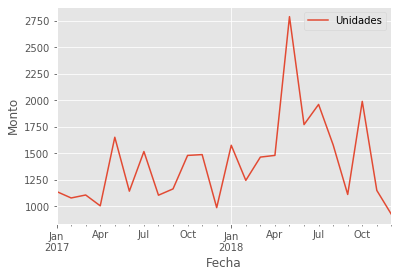

In [11]:
unidades_df.plot()
plt.ylabel('Monto')
plt.xlabel('Fecha')
plt.show()

## Hacemos análisis de ARIMA

In [12]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1), (2, 0, 0), (2, 0, 1), (2, 1, 0), (2, 1, 1), (3, 0, 0), (3, 0, 1), (3, 1, 0), (3, 1, 1)]


In [13]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Seleccionamos un subconjunto de la serie de datos como datos de entrenamiento, digamos los primeros 11 años. Nuestro objetivo es predecir el último año de la serie en función de esta información.

In [14]:
train_data = unidades_df['2017-01-01':'2018-12-01']
test_data = unidades_df['2018-01-01':'2018-12-01']

In [15]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [16]:
print('El valor de AIC más pequeño es {} para el modelo SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))


El valor de AIC más pequeño es 121.91190329978116 para el modelo SARIMAX(3, 1, 0)x(1, 0, 0, 12)


In [17]:
SARIMAX_model[AIC.index(min(AIC))][0]

(3, 1, 0)

In [18]:
SARIMAX_model[AIC.index(min(AIC))][1]

(1, 0, 0, 12)

In [19]:
# Ajustemos el modelo
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           Unidades   No. Observations:                   24
Model:             SARIMAX(3, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -55.956
Date:                            Wed, 14 Aug 2019   AIC                            121.912
Time:                                    09:32:26   BIC                            122.309
Sample:                                01-01-2017   HQIC                           119.233
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4357      0.756     -0.576      0.564      -1.917       1.046
ar.L2          0.5589      0.763      0.733      0.464      -0.936       2.053
ar.L3         -0.3530      0.879     -0.402      0.688      -2.075       1.369
ar.S.L12       1.9077      0.729      2.618      0.009       0.480       3.336
sigma2      6.964e+04   5.91e+04      1.179      0.238   -4.61e+04    1.85e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.24
Prob(Q):                               nan   Prob(JB):                         0.89
Heteroskedasticity (H):               0.83   Skew:                            -0.10
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ValueError: operands could not be broadcast together with shapes (9,) (6,) (9,) 

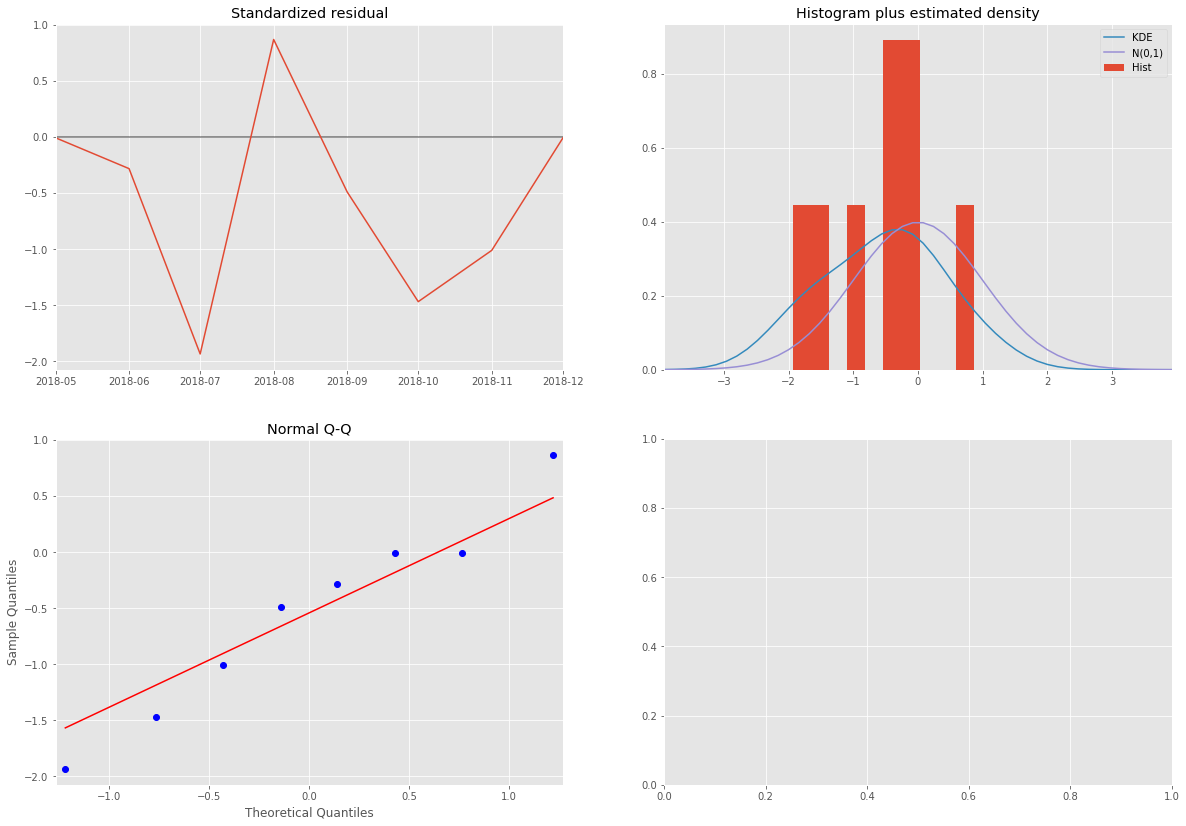

In [21]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

### Usamos el modelo para hacer predicciones

In [23]:
pred0 = results.get_prediction(start='2018-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

pred1 = results.get_prediction(start='2018-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

pred2 = results.get_forecast('2019-12-01')
pred2_ci = pred2.conf_int()

In [24]:
pred2.predicted_mean

2019-01-01    1154.337367
2019-02-01    1620.440567
2019-03-01     805.187817
2019-04-01    2301.068387
2019-05-01    3079.362969
2019-06-01    3140.902497
2019-07-01    1155.361660
2019-08-01    3175.755823
2019-09-01    -930.983503
2019-10-01    4507.505757
2019-11-01   -1500.893539
2019-12-01    3230.150885
Freq: MS, dtype: float64

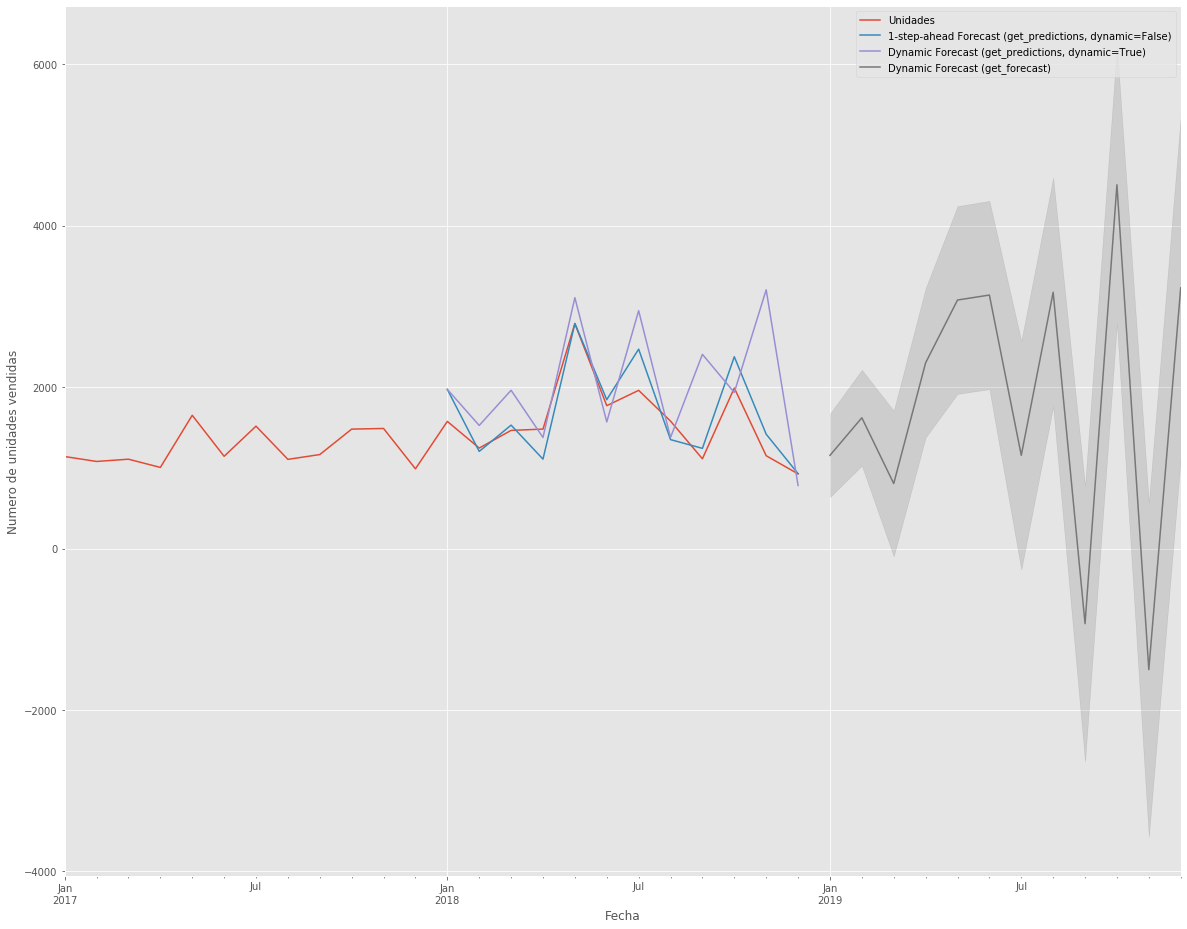

In [25]:
ax = unidades_df.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Numero de unidades vendidas')
plt.xlabel('Fecha')
plt.legend()
plt.show()

Calculamos el error de la predicción usando los datos 2018

In [26]:
prediction = pred0.predicted_mean['2018-01-01':'2018-12-01'].values
test_data = unidades_df['2018-01-01':'2018-12-01']

# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))

# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('El MAE porcentula para el año 2018 es {:.2f}%'.format(MAPE))

El MAE porcentula para el año 2018 es 13.13%


Obtenemos los valores de la predicción a futuro

In [27]:
print(pred2.predicted_mean['2019-01-01':'2019-12-01'])

2019-01-01    1154.337367
2019-02-01    1620.440567
2019-03-01     805.187817
2019-04-01    2301.068387
2019-05-01    3079.362969
2019-06-01    3140.902497
2019-07-01    1155.361660
2019-08-01    3175.755823
2019-09-01    -930.983503
2019-10-01    4507.505757
2019-11-01   -1500.893539
2019-12-01    3230.150885
Freq: MS, dtype: float64


## Agrupamos por Segmento

Usamos el campo `Clasificación 3` para agrupar los datos y construir los modelos

In [29]:
def compute_AIC(train_data):
    
    # Define the d and q parameters to take any value between 0 and 1
    q = d = range(0, 2)
    # Define the p parameters to take any value between 0 and 3
    p = range(0, 4)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    AIC = []
    SARIMAX_model = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_data,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
                AIC.append(results.aic)
                SARIMAX_model.append([param, param_seasonal])
            except:
                continue
    
    return SARIMAX_model, AIC

----------------------------------------

Group name:  1. < = 9,9 Kg 



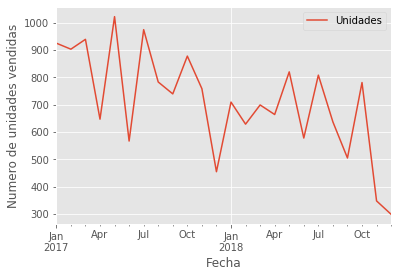

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8819      0.668     -1.320      0.187      -2.191       0.428
ar.L2          0.0527      0.840      0.063      0.950      -1.594       1.699
ar.L3          0.0643      0.672      0.096      0.924      -1.253       1.381
sigma2      8080.9230   6867.779      1.177      0.239   -5379.676    2.15e+04


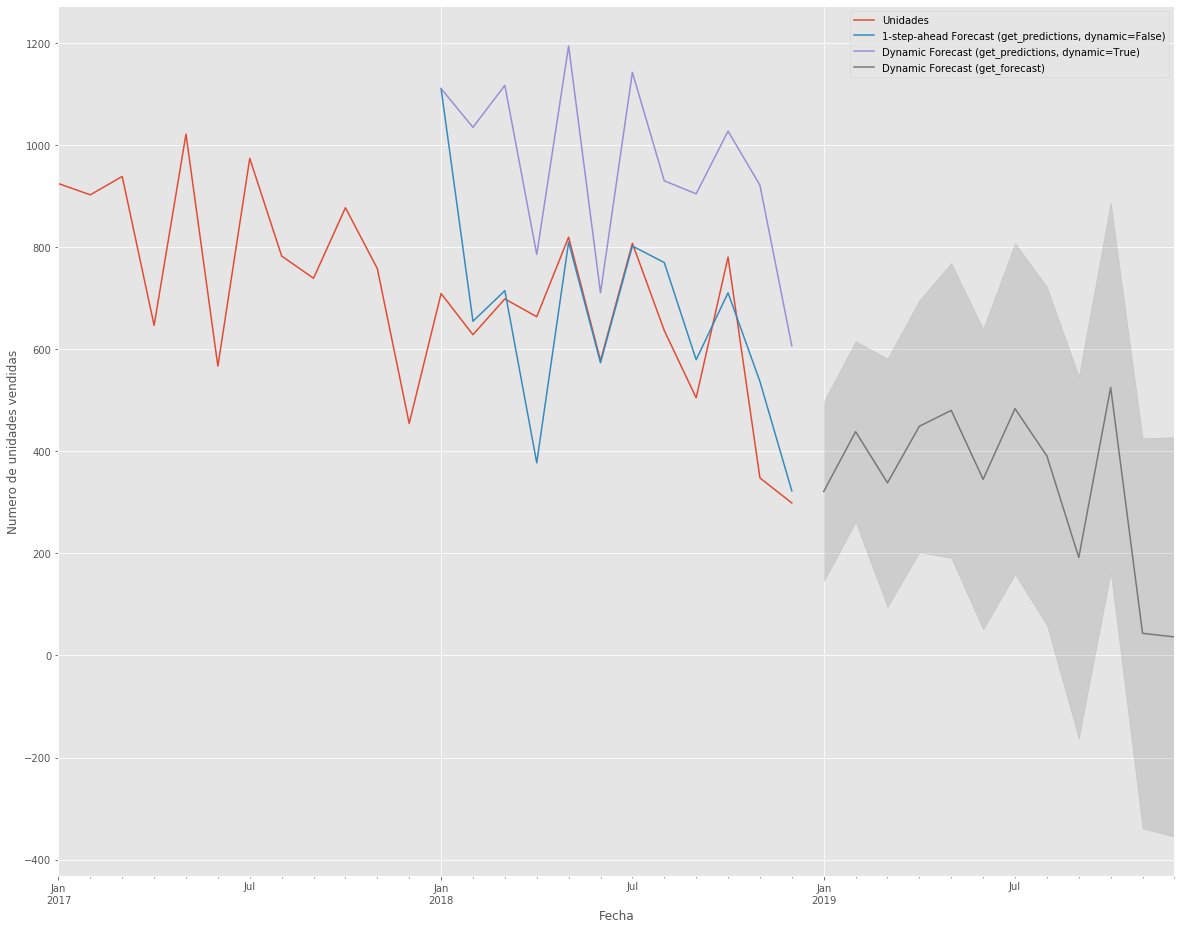

----------------------------------------

Group name:  2. [10,0 – 14,9] Kg 



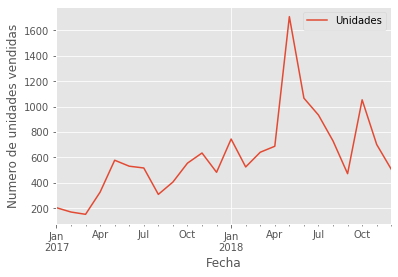

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2457      0.523     -0.469      0.639      -1.272       0.780
ar.L2          0.8366      0.232      3.608      0.000       0.382       1.291
ar.L3          0.7808      0.543      1.439      0.150      -0.283       1.845
ma.L1         -1.0000      1.408     -0.710      0.478      -3.760       1.760
ar.S.L12       2.3516      0.391      6.013      0.000       1.585       3.118
sigma2      2.937e+04    4.8e-05   6.12e+08      0.000    2.94e+04    2.94e+04


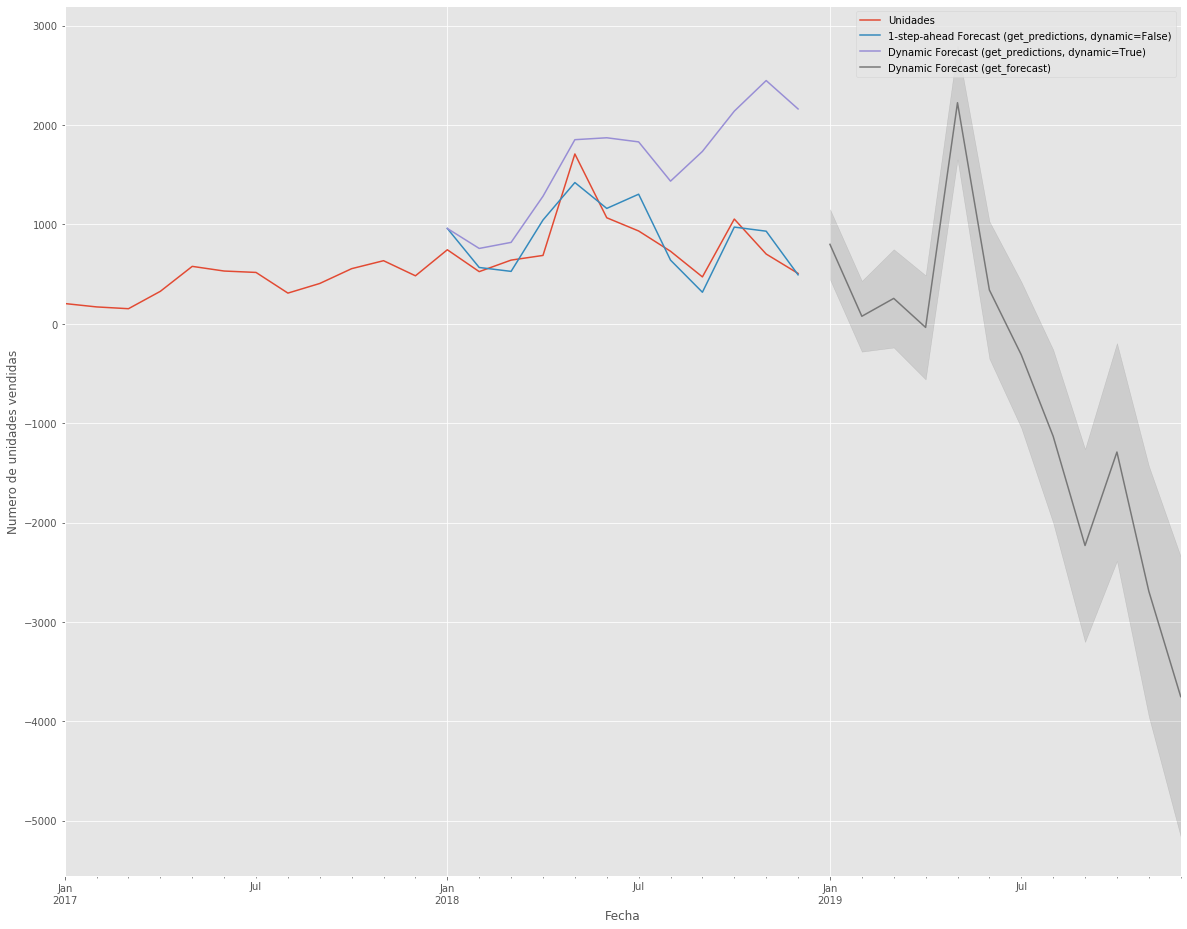

----------------------------------------

Group name:  5. >= 19 Kg 



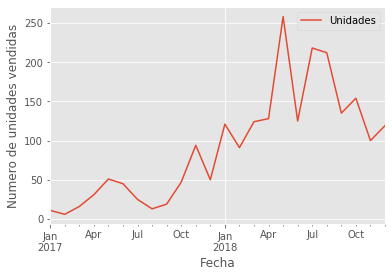

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7000      0.512     -1.367      0.172      -1.704       0.304
ar.L2         -0.0482      1.017     -0.047      0.962      -2.042       1.945
ar.L3          0.1963      0.685      0.287      0.774      -1.146       1.538
ar.S.L12      -0.1760      1.741     -0.101      0.919      -3.588       3.236
sigma2      3724.7467   4416.537      0.843      0.399   -4931.506    1.24e+04


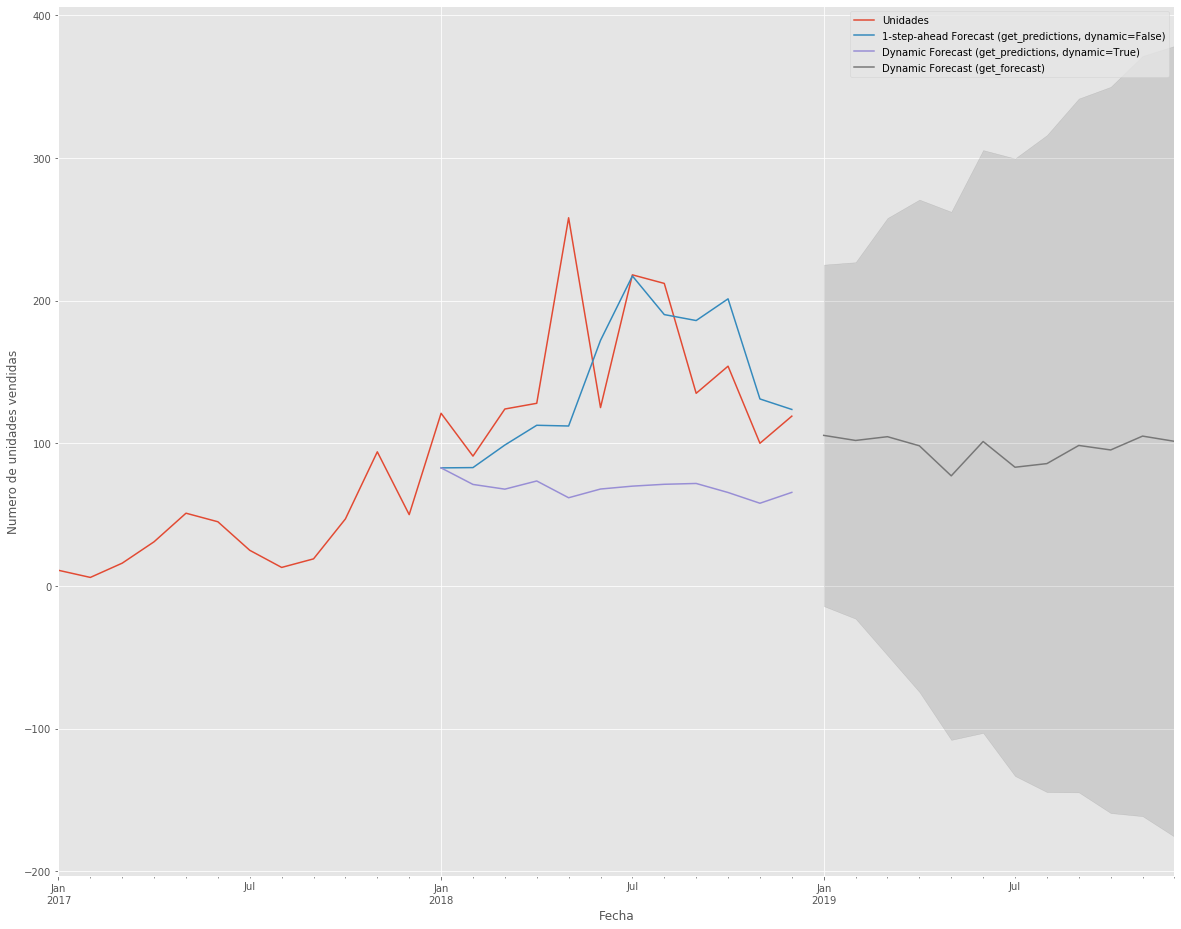

In [30]:
columns_mask = ['Clasificación 3','Unidades']
columns_groupby = ['Clasificación 3']

groups_df = data_df[columns_mask].groupby(columns_groupby)

for name, group_df in groups_df:
    print("-" * 40)
    print("\nGroup name: ", name, "\n")
    #print(group_df.head())
    
    unidades_df = group_df.groupby('datetime').sum()
    #print(temp_df.head())
    #print()
    
    train_data = unidades_df['2017-01-01':'2018-12-01']
    test_data = unidades_df['2018-01-01':'2018-12-01']
    
    unidades_df.plot()
    plt.ylabel('Numero de unidades vendidas')
    plt.xlabel('Fecha')
    plt.show()
    
    SARIMAX_model, AIC = compute_AIC(train_data)
    
    # Ajustemos el modelo
    model = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = model.fit()
    
    print(results.summary().tables[1])
    
    #results.plot_diagnostics(figsize=(20, 14))
    #plt.show()
    
    pred0 = results.get_prediction(start='2018-01-01', dynamic=False)
    pred0_ci = pred0.conf_int()

    pred1 = results.get_prediction(start='2018-01-01', dynamic=True)
    pred1_ci = pred1.conf_int()

    pred2 = results.get_forecast('2019-12-01')
    pred2_ci = pred2.conf_int()
    
    ax = unidades_df.plot(figsize=(20, 16))
    pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
    pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
    pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
    ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
    plt.ylabel('Numero de unidades vendidas')
    plt.xlabel('Fecha')
    plt.legend()
    plt.show()